In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
#Normalize the Data between -1 and 1

X_Train = (x_train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [10]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [6]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()



#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0

In [8]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [ ]:

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()
  

In [ ]:
!mkdir images

In [10]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [11]:
X_Train.shape

(60000, 28, 28, 1)

Epoch 1 D loss: 138.584986 G loss: 177.049562
Epoch 2 D loss: 174.254233 G loss: 202.283597
Epoch 3 D loss: 164.453192 G loss: 206.655366
Epoch 4 D loss: 164.079014 G loss: 198.896985
Epoch 5 D loss: 164.393488 G loss: 194.818080
Epoch 6 D loss: 163.766613 G loss: 194.145688
Epoch 7 D loss: 163.135802 G loss: 194.385365
Epoch 8 D loss: 162.768928 G loss: 193.876562
Epoch 9 D loss: 162.497860 G loss: 193.262693
Epoch 10 D loss: 162.214638 G loss: 193.877174


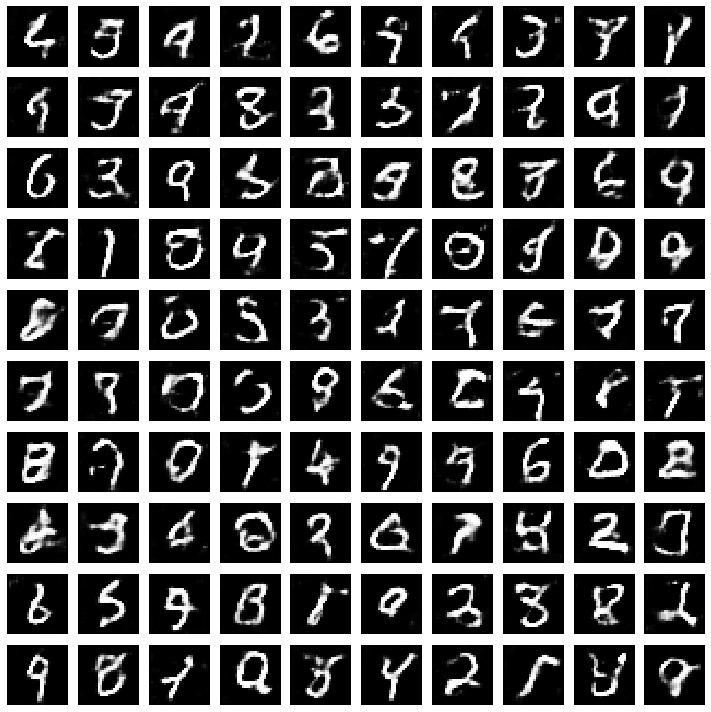

Epoch 11 D loss: 161.976703 G loss: 194.227947
Epoch 12 D loss: 161.714141 G loss: 194.797575
Epoch 13 D loss: 161.591896 G loss: 195.135378
Epoch 14 D loss: 161.438880 G loss: 194.674566
Epoch 15 D loss: 161.223211 G loss: 195.956585
Epoch 16 D loss: 161.088963 G loss: 195.869932
Epoch 17 D loss: 161.087983 G loss: 195.780501
Epoch 18 D loss: 160.919066 G loss: 196.575512
Epoch 19 D loss: 160.681283 G loss: 196.482020
Epoch 20 D loss: 160.570956 G loss: 197.933897


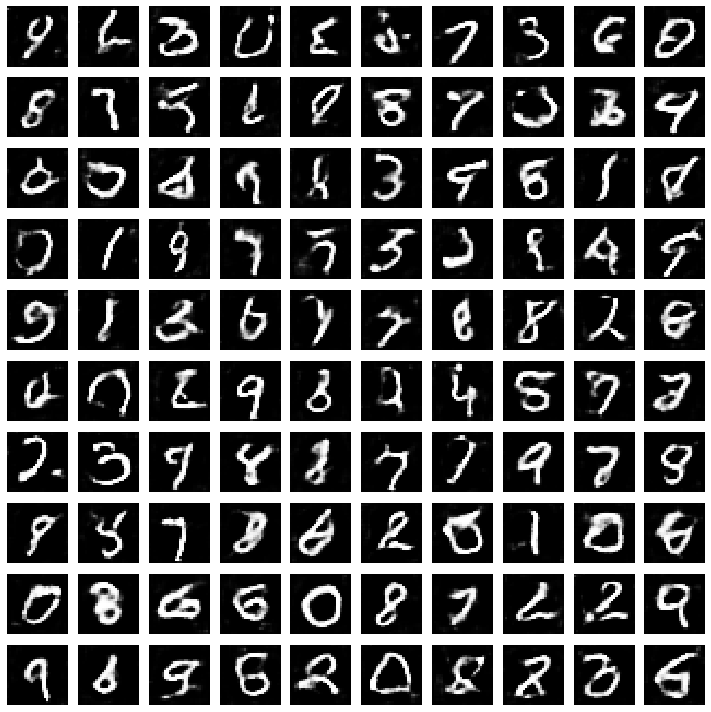

Epoch 21 D loss: 160.368250 G loss: 197.255869
Epoch 22 D loss: 160.467352 G loss: 196.368831
Epoch 23 D loss: 159.995658 G loss: 201.522743
Epoch 24 D loss: 159.990721 G loss: 198.699366
Epoch 25 D loss: 160.030502 G loss: 198.017903
Epoch 26 D loss: 159.855132 G loss: 199.096751
Epoch 27 D loss: 159.496985 G loss: 203.567138
Epoch 28 D loss: 159.012960 G loss: 203.917878
Epoch 29 D loss: 159.367013 G loss: 200.420241
Epoch 30 D loss: 159.035565 G loss: 202.222394


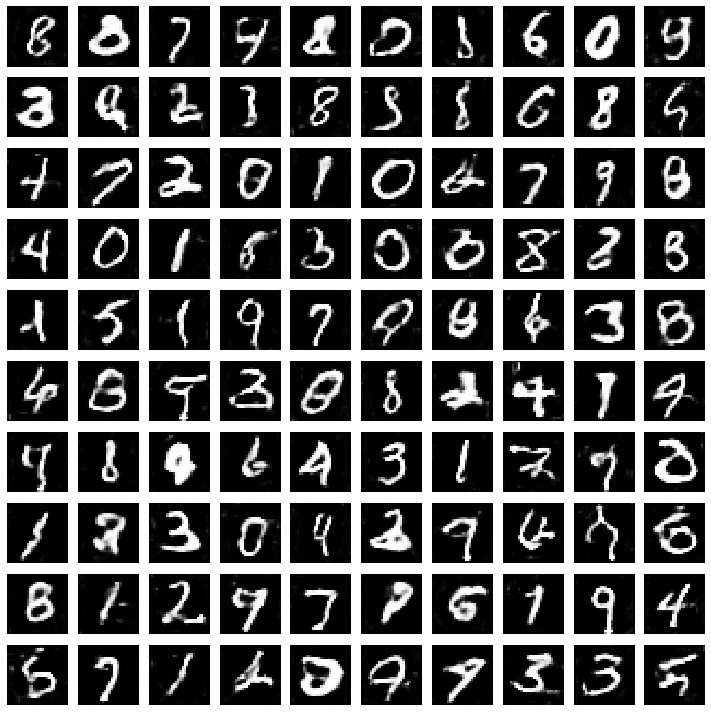

Epoch 31 D loss: 158.909299 G loss: 202.688794
Epoch 32 D loss: 158.874287 G loss: 202.922561
Epoch 33 D loss: 158.606264 G loss: 204.903579
Epoch 34 D loss: 158.532363 G loss: 204.841055
Epoch 35 D loss: 158.049901 G loss: 210.039962
Epoch 36 D loss: 157.959260 G loss: 206.214878
Epoch 37 D loss: 157.862197 G loss: 206.970223
Epoch 38 D loss: 157.680152 G loss: 208.489934
Epoch 39 D loss: 157.465381 G loss: 209.673089
Epoch 40 D loss: 157.468444 G loss: 210.022138


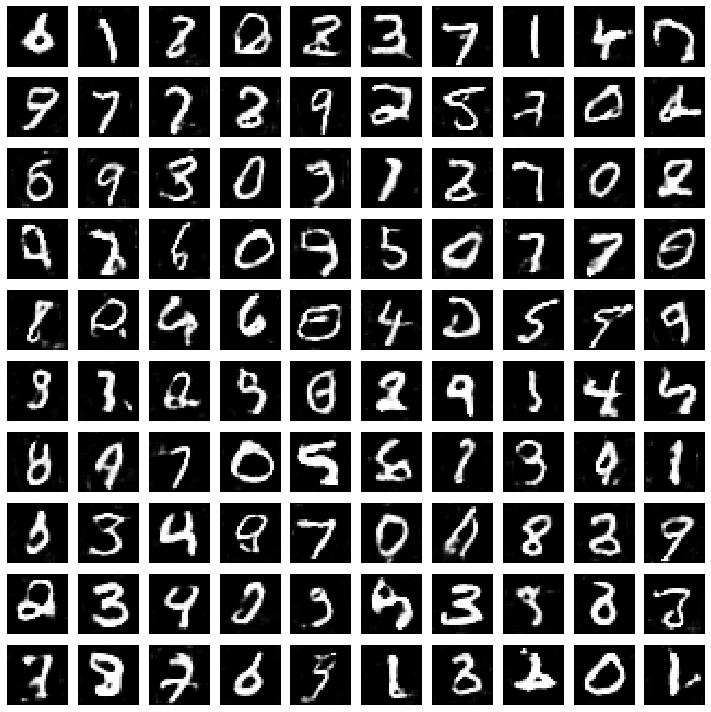

Epoch 41 D loss: 157.113865 G loss: 211.056315
Epoch 42 D loss: 156.808013 G loss: 212.255648
Epoch 43 D loss: 156.711945 G loss: 212.535521
Epoch 44 D loss: 156.370850 G loss: 213.934489
Epoch 45 D loss: 156.212578 G loss: 214.938730
Epoch 46 D loss: 155.880582 G loss: 215.966726
Epoch 47 D loss: 155.887422 G loss: 216.512259
Epoch 48 D loss: 155.772021 G loss: 217.956608
Epoch 49 D loss: 155.210329 G loss: 218.930553
Epoch 50 D loss: 154.945928 G loss: 220.628874


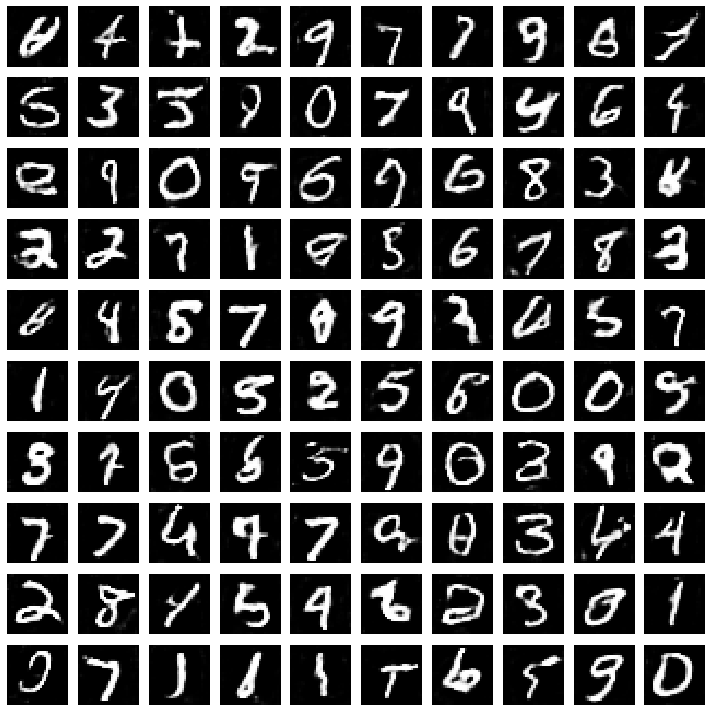

In [12]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
       

    

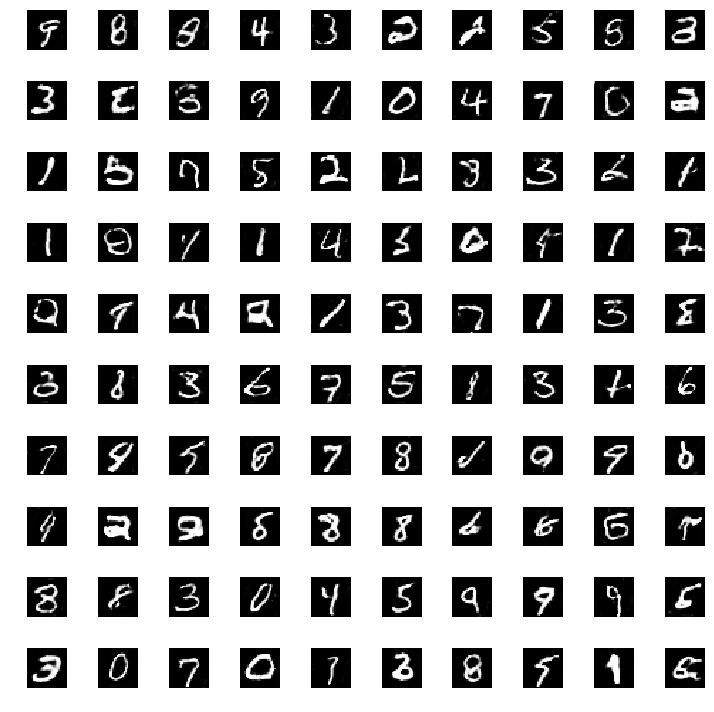

In [ ]:
save_imgs(50)